In [1]:
import pandas as pd
import numpy as np

from exchange import *
from agents import *

import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

# Exchange Visualization

In [2]:
e = Exchange()

e.add_bid(100, 5, "1", None)
e.add_bid(102, 2, "2", None)
e.add_bid(103, 3, "3", None)
e.add_bid(104, 4, "4", None)
e.add_bid(105, 10, "5", None)
e.add_ask(106, 8, "6", None)
e.add_ask(107, 3, "7", None)
e.add_ask(109, 12, "8", None)
e.add_ask(110, 6, "9", None)
e.add_ask(115, 4, "10", None)

In [3]:
def show_exchange(exchange):
    bidPrices = list(exchange.bids.keys())
    bidQtys = list(exchange.bids.values())
    askPrices = list(exchange.asks.keys())
    askQtys = list(exchange.asks.values())

    plt.figure(figsize=(3, 5))
    plt.barh(bidPrices, bidQtys, color="green", label=f"bid qty: {sum(bidQtys)}")
    plt.barh(askPrices, askQtys, color="red", label=f"ask qty: {sum(askQtys)}")
    plt.legend()
    plt.ylabel("price")
    plt.xlabel("qty")
    plt.title("Exchange Ladder")

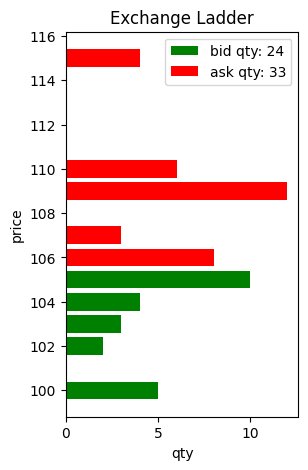

In [4]:
show_exchange(e)

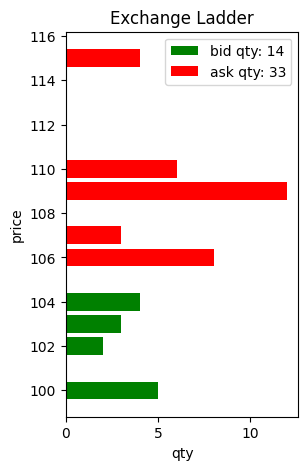

In [5]:
e.add_ask(105, 10, "11", None)
show_exchange(e)

# Simulation Elements

In [6]:
'''
# TODO: agent arrival process
# TODO: agent cancel duration
# TODO: true price movement changing (variance over time)
# TODO: agent reading true price (with some noise)
# TODO: agent aggression level (bid / ask)
# TODO: agent interaction logic with exchange
'''


'\n# TODO: agent arrival process\n# TODO: agent cancel duration\n# TODO: true price movement changing (variance over time)\n# TODO: agent reading true price (with some noise)\n# TODO: agent aggression level (bid / ask)\n# TODO: agent interaction logic with exchange\n'

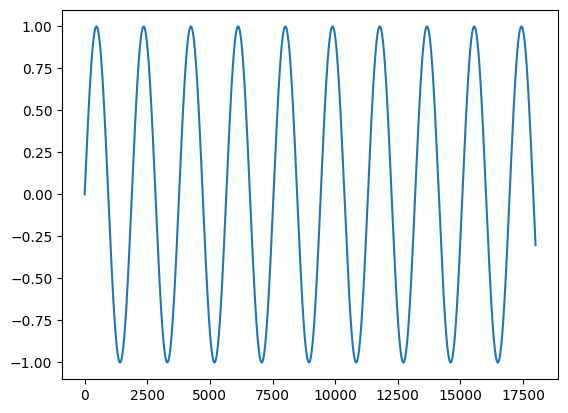

In [7]:
x = np.arange(0, 5 * 60 * 60)
T = 60 * 5 # period
y = np.sin(x / T)
plt.plot(x, y)

In [8]:
t = 40
true_price = np.sin(t / T)
true_price

0.13293862262231407

In [9]:
e.asks

defaultdict(<function exchange.Exchange.add_ask.<locals>.<lambda>()>,
            {106: 8, 107: 3, 109: 12, 110: 6, 115: 4})

In [10]:
e.ask_customers

{'6': (106, 0, 8, None),
 '7': (107, 0, 3, None),
 '8': (109, 0, 12, None),
 '9': (110, 0, 6, None),
 '10': (115, 0, 4, None)}

In [11]:
# pre-determine some true price curve as a function of time
# can begin as uniform
random.seed(88)
e = Exchange()

### defining hyperparameters ###
agent_arrival_rate = 0.1
taker_probability = 0.4

price_function = lambda t: 100
# true_price_func = lambda t: np.sin(t / 5*60)
customer_id = 1

while e.get_timestamp() < 1000:     
    ### pseudo code this ###

    # agent arrives by some exponential inter-arrival time simulating poisson
    # increment timestamp by exponential variable
    # calculate agent's characteristics (aggression level, theo value, cancel duration)
    # first check existing cancel queue, remove orders if necessary
    # add agent's bid/asks to exchange
    # plot exchange
    # sidenote: also need to increment customerids

    # add in own policy logic 

    ### ------------------------------------------------------------ ###

    # agents arrive at same rate, some probability they are maker vs taker
    agent_arrival_time = random.expovariate(agent_arrival_rate)
    e.increment_timestamp(agent_arrival_time)

    order_duration_sd = 0.0 # placeholder
    theo_sd = 2.5
    agent_is_taker = random.random() < taker_probability
    if not agent_is_taker:
        mvn_skews = [8, 0]
        mvn_means = [2, 10]
        mvn_cov = [[9, -5.625], [-5.625, 6.25]]

        a = Maker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, price_function(e.get_timestamp()), customer_id)
    
    else: 
        mvn_skews = [8, 0]
        mvn_means = [2, 20]
        mvn_cov = [[9, -9], [-9, 16]]
        
        a = Taker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, price_function(e.get_timestamp()), customer_id)
        
    # check cancelled orders
    # for cid in e.ask_customers.keys():
    #     curr_time = e.get_timestamp()
    #     curr_agent = e.ask_customers[cid][3]
    #     order_time = e.ask_customers[cid][1]
    #     if curr_time > curr_agent.get_order_duration() + order_time:
    #         e.remove_ask(cid)
        
    # for cid in e.bid_customers.keys():
    #     curr_time = e.get_timestamp()
    #     curr_agent = e.bid_customers[cid][3]
    #     order_time = e.bid_customers[cid][1]
    #     if curr_time > curr_agent.get_order_duration() + order_time:
    #         e.remove_bid(cid)

    e.add_order(a)

    print(e.get_timestamp())
    customer_id += 1

5.06649152346173
14.889124084686626
26.82033315576537
38.404853057040874
39.71014306307847
44.98986572705015
46.492163242645944
66.24898217210261
69.09195626901915
71.5684840954229
115.60382242742809
126.03591820011951
141.35372434696438
146.10212827790525
152.85315398770172
158.44692042602298
158.6560624699274
159.5474457359971
196.7431871312944
202.99082993398238
212.75412333358867
224.37311643270587
232.84166313375675
242.77662853069523
258.8432194333348
276.10273703623557
278.85896853737216
293.54400764373804
294.38777847633435
294.70952631899667
296.9428875578501
307.8042698809399
313.53623993019414
315.00081614336204
347.597139912308
358.9569785486046
381.39051104833953
384.7060160271542
388.009407197176
412.8021240731782
413.23800555965937
418.18767789261545
420.18716756841695
425.2798462730731
437.30045102472735
437.6588580505215
442.21535623643
446.6809949879865
458.33867934974063
474.92225299527
478.6505027739452
482.24073825398415
495.5342429559355
516.8844677074053
518.2509

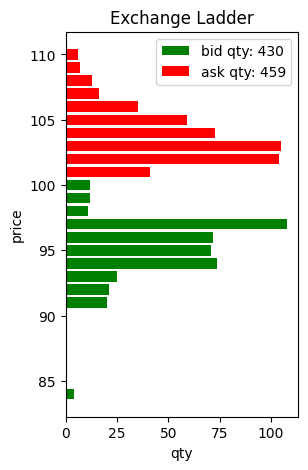

In [12]:
show_exchange(e)

In [13]:
# write code to parse transactions and get pnl

In [14]:
def summarize_transactions(transaction_arr):
    df = pd.DataFrame(transaction_arr)

    summary = 

SyntaxError: invalid syntax (3706494652.py, line 4)

In [15]:
arr = e.get_transactions()
# arr

df = pd.DataFrame(arr)
long = df[["bid_customerid", "price", "quantity", "timestamp", "aggressor_side"]]
long["customer_side"] = ["bid"] * len(long)
long = long.rename(columns={"bid_customerid": "customer_id"})
short = df[["ask_customerid", "price", "quantity", "timestamp", "aggressor_side"]]
short["customer_side"] = ["ask"] * len(long)
short = short.rename(columns={"ask_customerid": "customer_id"})
short.loc[:, "quantity"] = -1 * short["quantity"]

summary = pd.concat([long, short], axis=0).sort_values("timestamp")
summary.head()

/var/folders/y9/l2z6fxk97j32t00jbm20rm6w0000gn/T/ipykernel_57304/1836975833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
/var/folders/y9/l2z6fxk97j32t00jbm20rm6w0000gn/T/ipykernel_57304/1836975833.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


,customer_id,price,quantity,timestamp,aggressor_side,customer_side
0,7,99,5,46.492163,bid,bid
0,1,99,-5,46.492163,bid,ask
1,7,99,11,66.248982,ask,bid
1,8,99,-11,66.248982,ask,ask
2,12,101,7,126.035918,bid,bid


In [16]:
summary["true_profit"] = (price_function(summary["timestamp"]) - summary["price"]) * summary["quantity"]
summary.head()

,customer_id,price,quantity,timestamp,aggressor_side,customer_side,true_profit
0,7,99,5,46.492163,bid,bid,5
0,1,99,-5,46.492163,bid,ask,-5
1,7,99,11,66.248982,ask,bid,11
1,8,99,-11,66.248982,ask,ask,-11
2,12,101,7,126.035918,bid,bid,-7


In [17]:
summary.groupby("customer_id").sum()[["true_profit"]].sort_values("true_profit", ascending=False)

,true_profit
customer_id,
39,72
52,60
15,46
34,40
33,40
...,...
97,-40
16,-48
36,-50


In [18]:
e.orders[39]

{'bid': (99, 13), 'ask': (103, 13)}

In [19]:
e.orders[47]

{'ask': (95, 15)}